### Predicting House Price if Below or Above Market Price

In [3]:
import pandas as pd

data = pd.read_csv("housepricedata.csv")

In [4]:
# Check values if any is null

data.isnull().values.any()

False

In [5]:
PREDICTORS = data.columns[:-1]
TARGET = data.columns[-1]

In [6]:
# Scale the data values

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[PREDICTORS] = scaler.fit_transform(data[PREDICTORS])

In [7]:
# Split the data into train and test set

from sklearn.model_selection import train_test_split

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(data[PREDICTORS], data[TARGET], test_size=0.3, random_state=42)

X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [8]:
X_train, X_val, X_test = (i.values.tolist() for i in [X_train, X_val, X_test])
Y_train, Y_val, Y_test = (i.values.flatten().tolist() for i in [Y_train, Y_val, Y_test])

#### Data Set Summary

X_train (10 input features, 70% of full dataset)<br>
X_val (10 input features, 15% of full dataset)<br>
X_test (10 input features, 15% of full dataset)<br>
Y_train (1 label, 70% of full dataset)<br>
Y_val (1 label, 15% of full dataset)<br>
Y_test (1 label, 15% of full dataset)

In [9]:
from ipynb.fs.full import neural_network

0.5
0 1.6707433287659994
1 0.9012897827249918
2 0.4772769379002744
3 0.2793655526216228
4 0.17171599961828113
5 0.11350956790089266
6 0.08188521967016459
7 0.06304666670014032
8 0.05065514943560243
9 0.041997065993288146
10 0.03566354311941158
11 0.030859489361957905
12 0.027107832602583485
13 0.024107376887656212
14 0.021659723187888894
15 0.019629436077879807
16 0.017921213722826297
17 0.016466225492066226
18 0.015213624557510907
19 0.014125100922803684


In [12]:
import numpy as np

def train_model(model, X_train, y_train, X_val, y_val, epoch, lr, batch_size=0):
    train_losses = []
    val_losses = []

    for k in range(epoch):
        # Shuffle the training data
        train_indices = np.random.permutation(len(X_train))
        X_train = [X_train[i] for i in train_indices]
        y_train = [y_train[i] for i in train_indices]

        # Initialize variables for accumulating gradients and losses
        train_loss = 0.0
        train_correct = 0

        batch_size = batch_size if batch_size != 0 else len(y_train)

        # Iterate over the training dataset in batches
        for start in range(0, len(X_train), batch_size):
            end = start + batch_size
            batch_xs = X_train[start:end]
            batch_ys = y_train[start:end]

            # Forward pass
            ypred = [model(x) for x in batch_xs]
            loss = ([p.neg_log_loss(y) for p, y in zip(ypred, batch_ys)])
            loss = sum(loss)/len(loss)

            # Backward pass and parameter update
            for p in model.parameters():
                p.grad = 0
            loss.backward()

            for p in model.parameters():
                p.data -= lr * p.grad

            # Accumulate training loss
            train_loss += loss * len(batch_xs)

            #Accuracy
            train_outputs = [1 if i.data >= 0.4 else 0 for i in ypred]
            correct = np.sum(np.array(train_outputs) == np.array(batch_ys))
            train_correct += correct
        # Average training loss for the epoch
        train_loss /= len(X_train)
        train_losses.append(train_loss)
        train_accuracy = train_correct / len(X_train)

        # Validation loss calculation
        val_loss = 0.0
        val_correct = 0
        for x, y in zip(X_val, y_val):
            y_pred_val = model(x)
            val_loss += y_pred_val.neg_log_loss(y)
            
            output = None
            if y_pred_val.data >= 0.4:
                output = 1
            else: output = 0
            if output == y: val_correct += 1
        val_loss /= len(X_val)
        val_losses.append(val_loss)
        val_accuracy = val_correct / len(X_val)

        # Print average losses for the epoch
        print(f"Epoch {k+1}: Train Loss: {train_loss}, Validation Loss: {val_loss}")
        print(f"Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")

        # Clear gradients after each epoch
        for p in model.parameters():
            p.grad = 0

    return train_losses, val_losses

In [13]:
# Initiate the model
MLP = neural_network.MLP
model = MLP(10, [(5, 'relu'), (5, 'relu'), (1, 'sigmoid')]) #use sigmoid on last layer as the classification is binary

# Train the model
train_losses, val_losses = train_model(model, X_train, Y_train, X_val, Y_val, 20, 0.05, 8)

Epoch 1: Train Loss: Value(data=0.695424954279245), Validation Loss: Value(data=0.6726609210934538)
Train Accuracy: 0.5293542074363993, Validation Accuracy: 0.4794520547945205
Epoch 2: Train Loss: Value(data=0.6084114258589709), Validation Loss: Value(data=0.4827893461269136)
Train Accuracy: 0.5684931506849316, Validation Accuracy: 0.7031963470319634
Epoch 3: Train Loss: Value(data=0.4126573528903238), Validation Loss: Value(data=0.3128347500398168)
Train Accuracy: 0.8277886497064579, Validation Accuracy: 0.8356164383561644
Epoch 4: Train Loss: Value(data=0.3483502038059394), Validation Loss: Value(data=0.25279960165415855)
Train Accuracy: 0.8454011741682974, Validation Accuracy: 0.8858447488584474
Epoch 5: Train Loss: Value(data=0.33897450362997666), Validation Loss: Value(data=0.22436110354444788)
Train Accuracy: 0.8454011741682974, Validation Accuracy: 0.8995433789954338
Epoch 6: Train Loss: Value(data=0.3301080681474466), Validation Loss: Value(data=0.2122293309989479)
Train Accura

In [14]:
test_preds = model.predict(X_test)

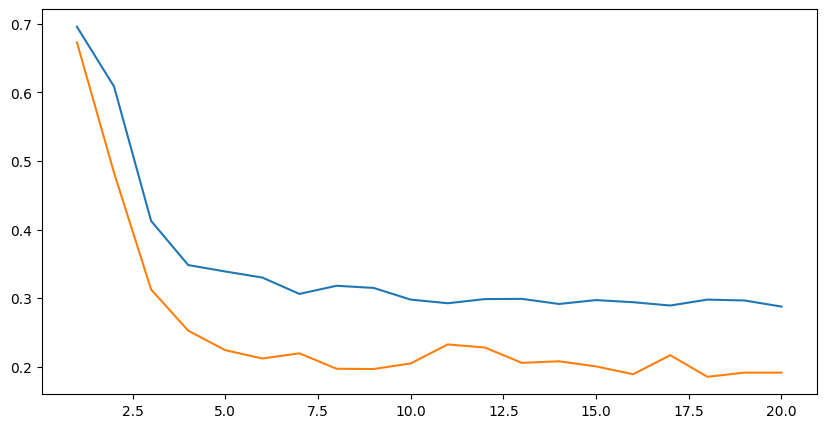

In [15]:
import matplotlib.pyplot as plt

tl = [i.data for i in train_losses]
vl = [i.data for i in val_losses]

plt.figure(figsize=(10,5))
plt.plot(np.arange(1, 21, 1), tl)
plt.plot(np.arange(1, 21, 1), vl)